In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df=pd.read_csv('placement.csv')

In [83]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [84]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


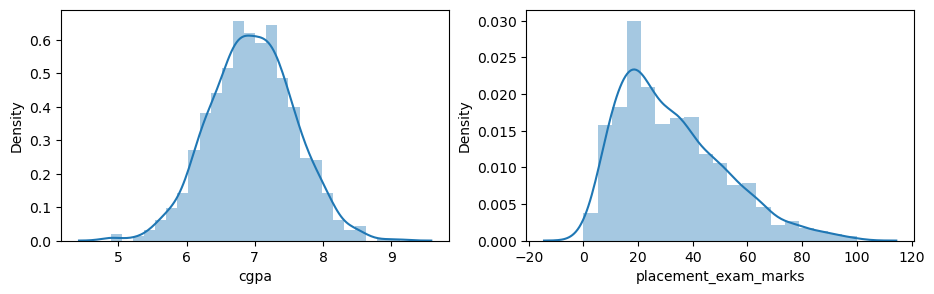

In [23]:
#plot diagram
plt.figure(figsize=(11,3))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])



plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()


show placement exam marks have skewness thats why we only apply on cgpa 

In [85]:
#finding boundry values
upper=df['cgpa'].mean()+3*df['cgpa'].std()
lower=df['cgpa'].mean()-3*df['cgpa'].std()

In [86]:
upper

8.808933625397177

In [74]:
lower

5.113546374602842

In [87]:
# outliers  list
df[(df['cgpa']<5.1) | (df['cgpa']>8.8)]

,cgpa,placement_exam_marks,placed
485,4.92,44,1
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
999,4.90,10,1


# Trimmng

In [88]:
df_new=df[(df['cgpa']>5.1) & (df['cgpa']<8.8)]
df_new

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
991,7.04,57,0
992,6.26,12,0
993,6.73,21,1
994,6.48,63,0


In [89]:
# Approach 2

# Calculating the Zscore

df['z_score']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [90]:
df[df['z_score']<-3]

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44,1,-3.314251
997,4.89,34,0,-3.362960
999,4.90,10,1,-3.346724


In [91]:
df[df['z_score']>3]

,cgpa,placement_exam_marks,placed,z_score
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062


In [96]:
 df[(df['z_score']>3) | (df['z_score']<-3)]
    

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44,1,-3.314251
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062
997,4.89,34,0,-3.362960
999,4.90,10,1,-3.346724


In [100]:
#triming
new_df = df[(df['z_score'] < 3) & (df['z_score'] > -3)]


In [101]:
new_df

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371
...,...,...,...,...
991,7.04,57,0,0.127878
992,6.26,12,0,-1.138565
993,6.73,21,1,-0.375452
994,6.48,63,0,-0.781363


CAPPING

In [102]:

upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [105]:
df['cgpa'] = np.where(df['cgpa']>upper_limit,upper_limit, np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa'] ))


In [106]:
df['cgpa']

0      7.190000
1      7.460000
2      7.540000
3      6.420000
4      7.230000
         ...   
995    8.808934
996    8.808934
997    5.113546
998    8.620000
999    5.113546
Name: cgpa, Length: 1000, dtype: float64

In [107]:

df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64